<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/1209_%EA%B3%BC%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 p.409-451

#7단원. 군집화

## 01. K-평균 알고리즘 이해



---



**K-평균** : 군집화에서 가장 일반적으로 사용되는 알고리즘

   : 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

* <군집 중심점> 

: 선택된 **포인트의 평균 지점**으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스 반복적으로 수행.

: 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법



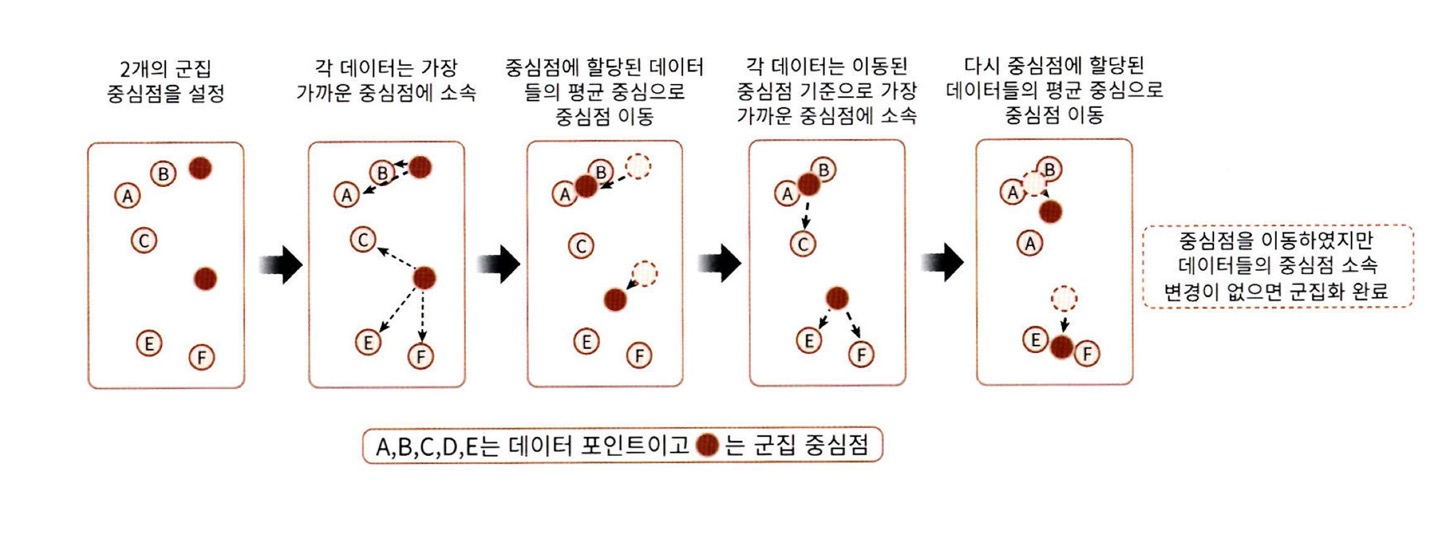

* K-평균의 장점
  + 일반적인 군집화에서 가장 많이 활용되는 알고리즘
  + 알고리즘이 쉽고 간결

* K-평균의 단점
  + 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
  + 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
  + 몇 개의 군집을 선택해야 할지 가이드하기가 어려움

### 사이킷런 KMeans 클래스 소개

* 사이킷런은 K-평균 구현하기 위해 **KMeans** 클래스 제공



```
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                           precompute_distances='auto', verbose=0, random_state=None,
                           copy_x=True, n_jobs=1, algorithm='auto')
```


* 파라미터
  + **n_clusters** : 군집화할 개수, 즉 군집 중심점의 개수 의미 (가장 중요)
  + **init** : 초기에 군집 중심점의 좌표를 설정할 방식. 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
  + **max_iter** : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동 없으면 종료.

* fit(데이터 세트) 또는 fit_transform(데이터 세트) 이용해 수행
* 군집화 수행 완료 후 알 수 있는 군집화와 관련된 주요 속성
  + **labels_** : 각 데이터 포인트가 속한 군집 중심점 레이블
  + **cluster_centers_** : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능.

### K-평균을 이용한 붓꽃 데이터 세트 군집화

붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종 분류하는 데이터 세트 이용해 K-평균 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


* 붓꽃 데이터 세트를 3개 그룹으로 군집화
  + n_clusters는 3, 초기 중심 설정 방식은 디폴트 값인 k-means++, 최대 반복 횟수도 디폴트 값인 max_iter=300으로 설정한 KMeans 객체 만들고 fit() 수행.

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

* kmeans의 labels_ 속성값 확인해 irisDF의 각 데이터가 어떤 중심에 속하는지

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


=> labels_의 값이 0,1,2이며 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미

* 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인
  + target 값을 'target' 칼럼으로, labels_ 값을 'cluster' 칼럼으로 지정해 추가
  + group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster값 개수 비교

In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


=> 분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됨.

Target 1 값 데이터는 2개만 2번 군집으로, 나머지 48개는 모두 0번 군집으로 그루핑됨. 

Target 2 값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됨.

* 2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현
  + PCA 이용해 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터 표현

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


* 마커별로 별도의 산점도 수행
  + pca_x는 X 좌표 값, pca_y는 Y 좌표 값
  + 각 군집별로 cluster 0은 마커 'o', cluster 1은 마커 's', cluster 2는 마커 '^'로 표현

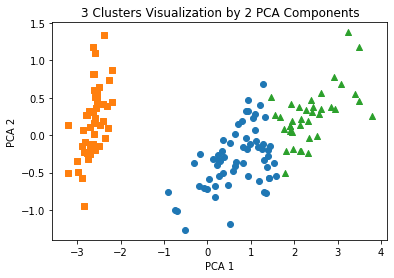

In [6]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,x,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

=> Cluster 1을 나타내는 네모('s')는 명확히 다른 군집과 잘 분리됨.

Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당 수준 분리돼 있지만, 네모만큼 명확하게는 분리돼 있지 않음.

### 군집화 알고리즘 테스트를 위한 데이터 생성

* 사이킷런은 군집화용 데이터 생성기로 **make_blobs()**와 **make_classification()** API 제공 => 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능

* 두 API 큰 차이는 없지만, make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가. make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

=) 이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트 만드는 데 사용

* make_blobs()의 호출 파라미터
  + **n_samples** : 생성할 총 데이터의 개수. 디폴트는 100개.
  + **n_features** : 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현.
  + **centers** : int 값. 예를 들어 3으로 설정하면 군집의 개수. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표 의미.
  + **cluster_std** : 생성될 군집 데이터의 표준 편차 의미. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용.




* X,y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0) 호출 시 -> 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y 반환

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


* make_blobs()으로 만든 피처 데이터 세트를 타깃값 0,1,2에 따라 마커 다르게 해 산점도 그려 군집화 분포 확인

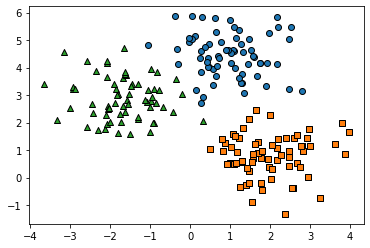

In [9]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers=['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

* KMeans 군집화를 수행한 뒤에 군집별로 시각화
  + KMeans 객체에 fit_predict(X) 수행해 make_blobs()의 피처 데이터 세트인 X 데이터 군집화
  + KMeans 객체의 **cluster_centers_** 속성은 개별 군집의 중심 위치 좌표 나타내기 위해 사용

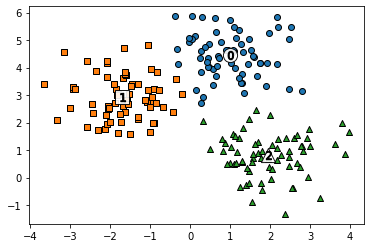

In [10]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker='$%d$' % label)
  
plt.show()

=> make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다(=산점도의 마커가 서로 다를 수 있다)

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


=> Target 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 거의 대부분 잘 매핑됨.

## 02. 군집 평가(Cluster Evaluation)



---



### 실루엣 분석의 개요

**실루엣 분석** : 군집화의 성능을 평가하는 대표적인 방법

: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지

-군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간 가지고 떨어져 있을 것

* 실루엣 계수 : 개별 데이터가 가지는 군집화 지표
  + 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표

* i번째 데이터 포인트의 실루엣 계수 값 **s(i) = (b(i)-a(i)) / (max(a(i),b(i)))**
  + a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
  + b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
  + -1에서 1 사이의 값. 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것. 0에 가까울수록 근처의 군집과 가까워진다는 것. -값은 아예 다른 군집에 데이터 포인트가 할당됐음.

* 사이킷런이 실루엣 분석을 위해 제공하는 메서드
  + sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수 계산해 반환
  + sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples()). 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단 가능 but 무조건 이 값이 높다고 해서 군집화 잘 됐다 판단x.

* 좋은 군집화 되려면 만족해야 하는 기준 조건

1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다

2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 해. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


=> 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값.

* 군집별 평균 실루엣 계수 값

In [13]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

=> 1번 군집에 비해 다른 군집은 상대적으로 평균값 낮아

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법



1. 군집의 개수 2개 => 평균 실루엣 계수 값 0.704

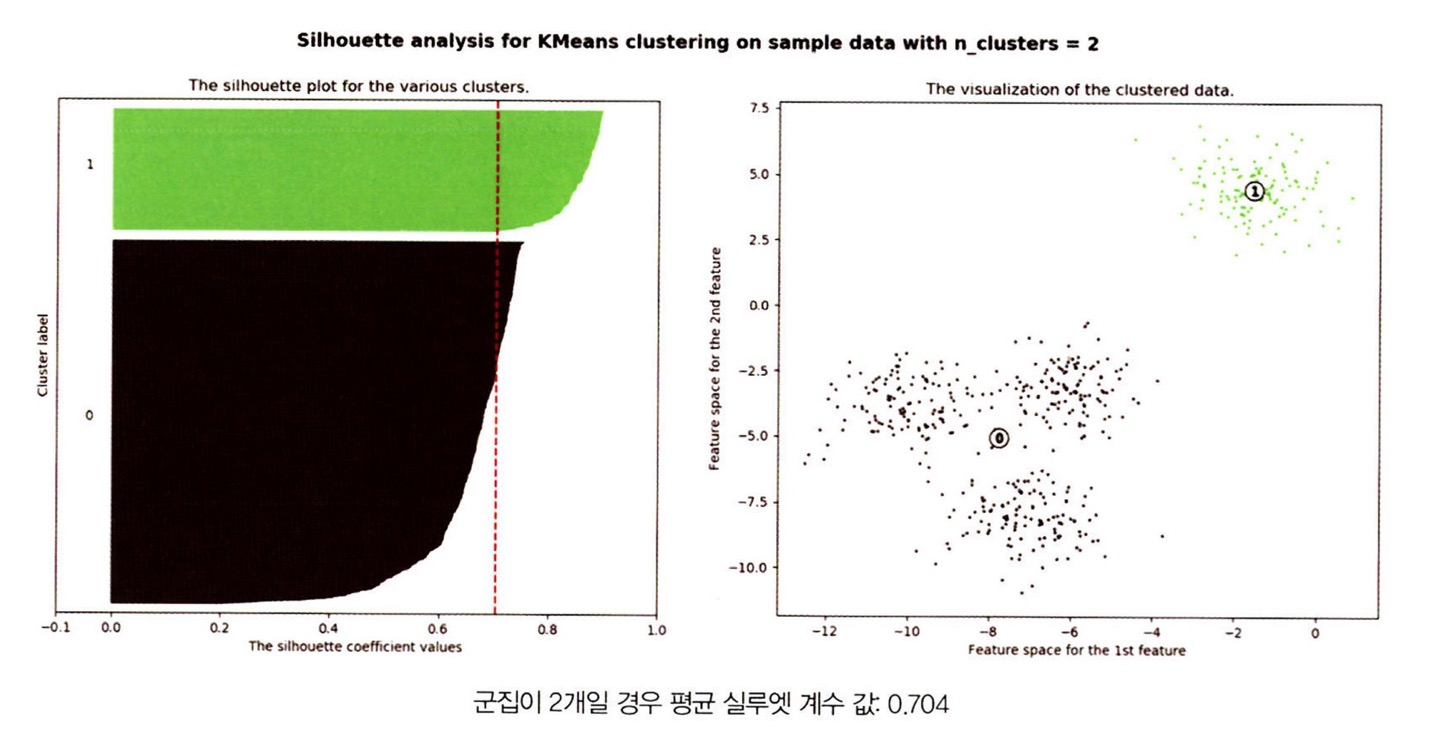

=> 왼쪽 부분은 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것.

X축은 실루엣 계수 값. Y축은 개별 군집과 이에 속하는 데이터. 개별 군집은 Y축에 숫자 값으로 0,1로 표시. 점선으로 표시된 선은 전체 평균 실루엣 계수 값.

=> 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상. 2번 군집의 경우는 평균보다 적은 데이터 값 많아.

=> 오른쪽 부분으로 보아도 1번 군집의 경우는 0번 군집과 멀리 떨어져 있고, 내부 데이터끼리도 잘 뭉쳐져. 0번 군집의 경우는 내부 데이터끼리 많이 떨어져 있는 모습.

2. 군집 개수 3개 => 평균 실루엣 계수 값 0.588

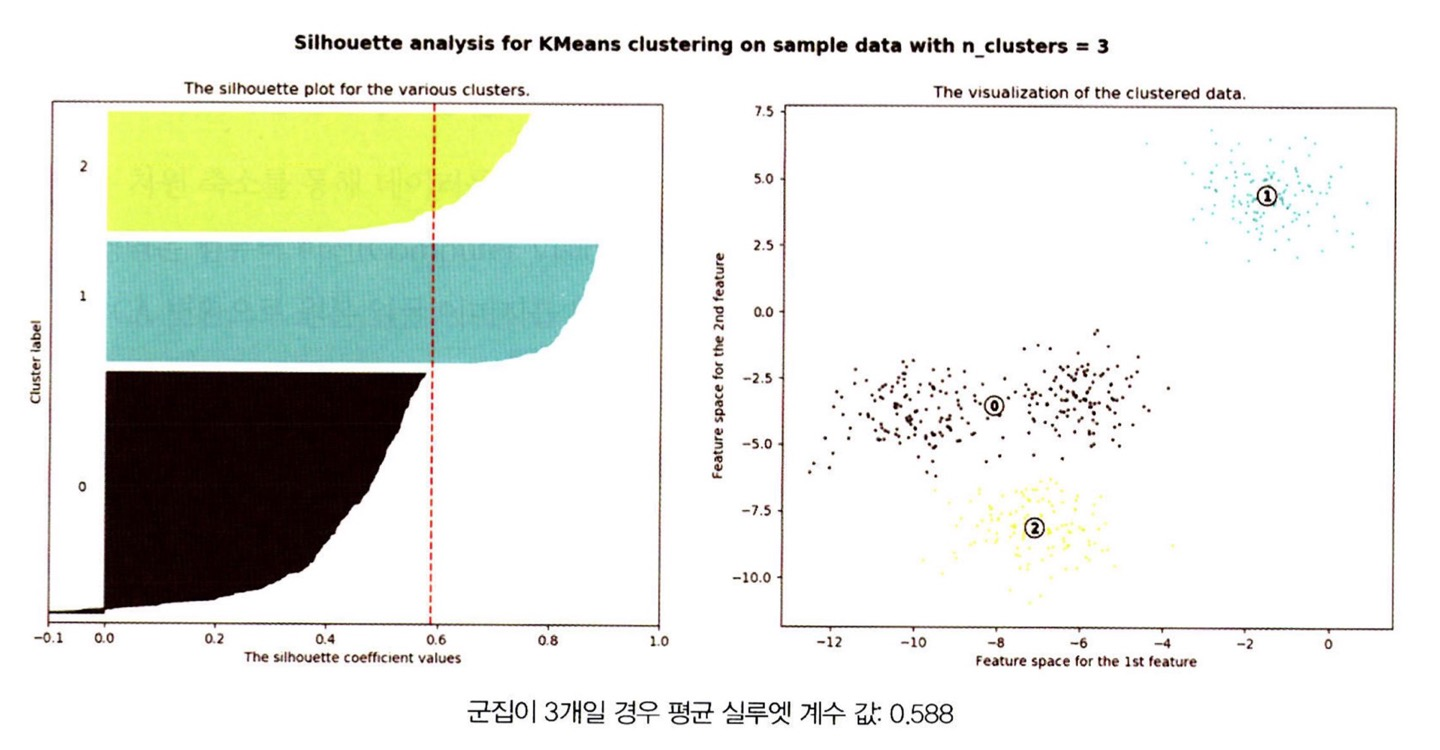

=> 1번,2번 군집의 경우 평균보다 높은 실루엣 계수 값. 0번의 경우 모두 평균보다 낮아. <- 오른쪽 그림 보면 0번의 경우 내부 데이터 간의 거리도 멀지만, 2번 군집과도 가깝게 위치하기 때문

3. 군집 개수 4개 => 평균 실루엣 계수 값 0.65

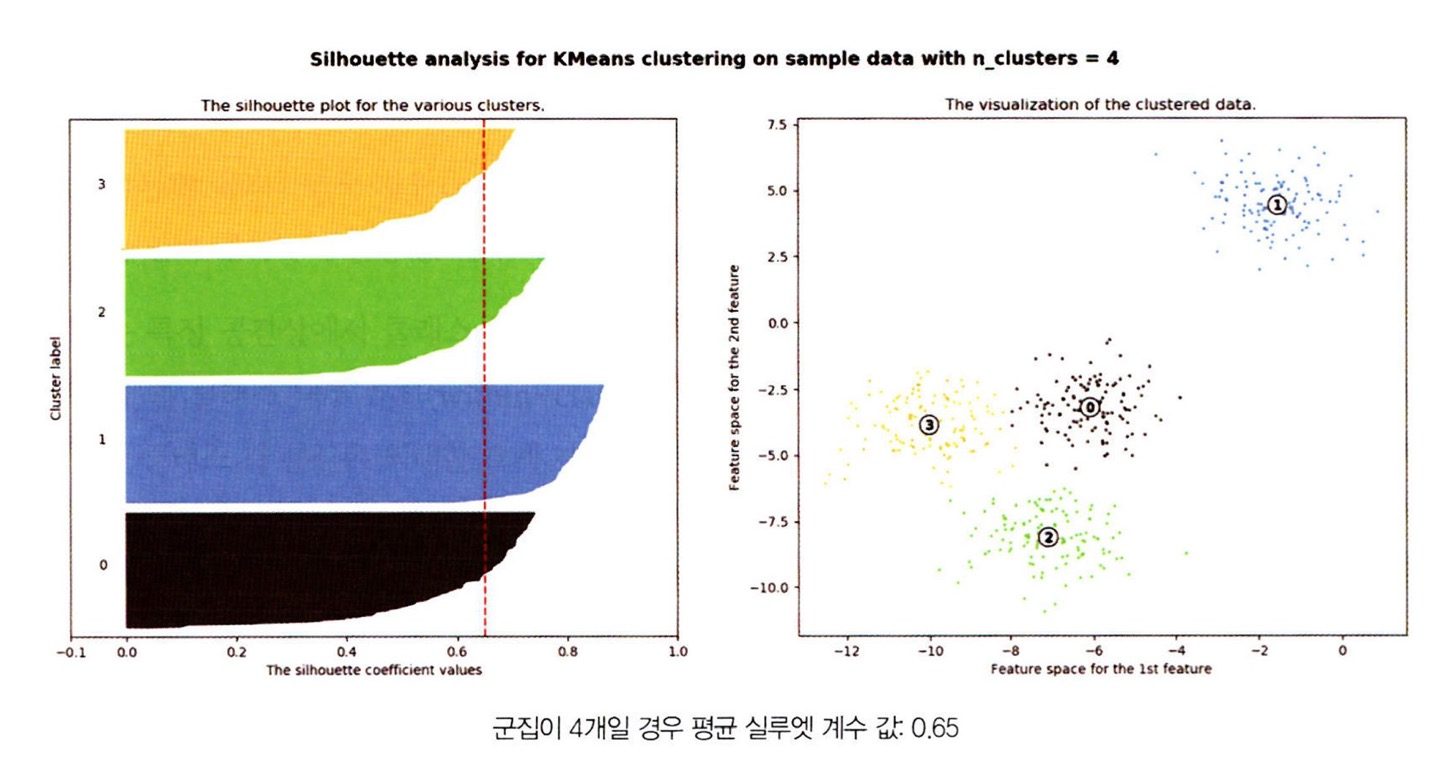

=> 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치.

=> 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 **4개**인 경우가 가장 이상적인 군집화 개수로 판단

* 군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수 visualize_silhouette(cluster_lists, X_features) 생성
  + 군집 개수 변화시키면서 K-평균 군집 수행했을 때 개별 군집별 평균 실루엣 계수 값 시각화해서 군집의 개수 정하는 데 도움.

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [15]:
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

* make_blobs() 함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트 만들고 이를 K-평균으로 군집화할 때 2개,3개,4개,5개 중 최적의 군집 개수를 시각화로

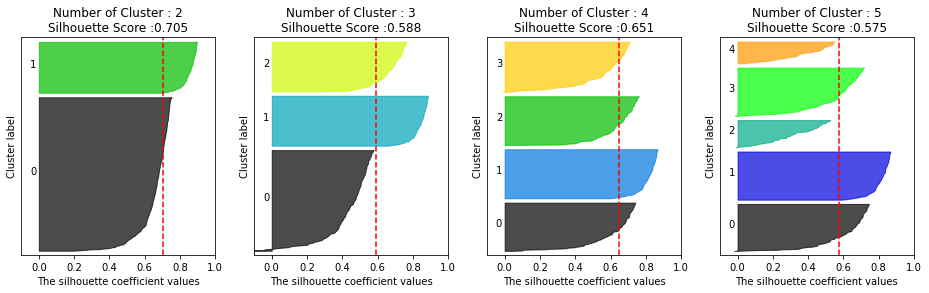

In [16]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0,10.0), shuffle=True, random_state=1)

# 군집 개수가 2개,3개,4개,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

=> 4개의 군집일 때 가장 최적.

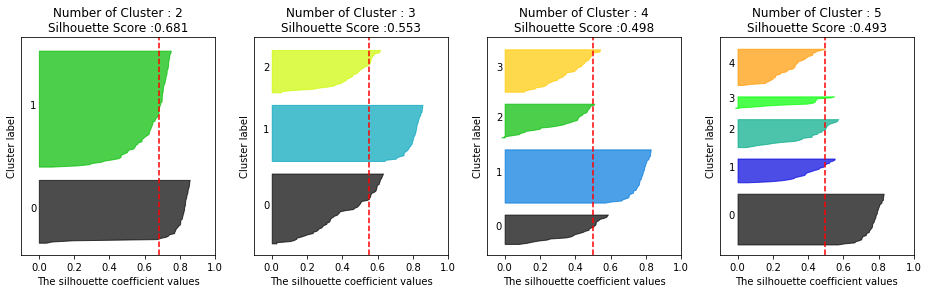

In [17]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

=> 2개의 군집일 때 가장 최적.

* 실루엣 계수를 통한 K-평균 군집 평가 방법은 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야해 -> 데이터 양 늘어나면 수행 시간 크게 늘어나.

=> 군집별로 임의의 데이터를 샘플링해 실루엣 계수 평가하는 방안

## 03. 평균 이동



---



### 평균 이동(Mean Shift)의 개요

**평균 이동** : 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행

: 중심을 데이터가 모여 있는 **밀도가 가장 높은 곳**으로 이동

* <평균 이동 군집화> : 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정. 일반적으로 확률 밀도 함수 찾기 위해 KDE 이용

: 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식. 전체 데이터에 반복적으로 적용.

* <**KDE**(Kernel Density Estimation)> : 개별 관측 데이터에 커널 함수 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수 추정.
  + 대표적인 커널 함수로서 가우시안 분포 함수 사용



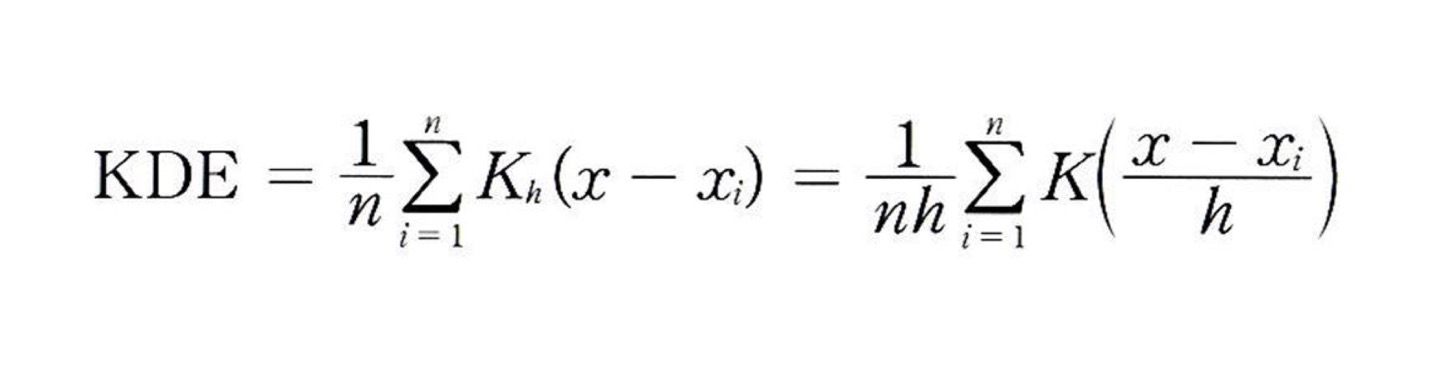

다음 식에서 K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭.

* 대역폭 h : KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화하는 데 적용. 어떻게 설정하느냐에 따라 확률 밀도 추정 성능 크게 좌우.
  + 작은 h값(h=1.0)은 좁고 뾰족한 KDE. 과적합하기 쉬워.
  + 매우 큰 h값(h=10)은 과도하게 평활화된 KDE로 인해 지나치게 단순화. 과소적합하기 쉬워.
  + => 적절한 KDE의 대역폭 h 계산하는 것 중요

* 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점 가져.
* 평균 이동 군집화는 군집의 개수 지정하지 않으며, 오로지 대역폭의 크기에 따라 군집화 수행

* 사이킷런은 평균 이동 군집화를 위해 **MeanShift** 클래스 제공
  + 가장 중요한 초기화 파라미터는 **bandwidth**. 대역폭 h와 동일.
* 사이킷런은 최적의 대역폭 계산을 위해 **estimate_bandwidth()** 함수 제공

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


=> 군집이 0부터 5까지 6개로 분류. 지나치게 세분화돼 군집화됨.

일반적으로 bandwidth 값을 작게 할수록 군집 개수 많아져.

In [19]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


=> bandwidth를 살짝 높인 1.0으로 해서 3개의 군집으로 군집화됨.

MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요.

* 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth() 함수 제공
  + 파라미터로 피처 데이터 세트 입력해주면 최적화된 bandwidth 값 반환

In [20]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


* 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화 수행

In [21]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


* 구성된 3개의 군집 시각화 - cluster_centers_ 속성으로 군집 중심 좌표 표시

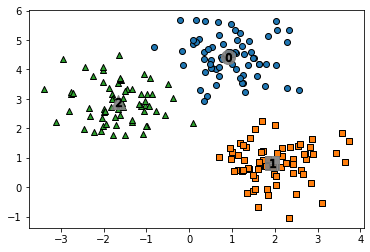

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

* target 값과 군집 label 값 비교 => 1:1로 잘 매칭됨

In [23]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


* (장점) 좀 더 유연한 군집화 가능/이상치의 영향력도 크지 않아/미리 군집의 개수 정할 필요도 없어
* (단점) 알고리즘의 수행 시간이 오래 걸려/band-width의 크기에 따른 군집화 영향도가 매우 커
* -> 컴퓨터 비전 영역에서 더 많이 사용. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할 수행하는 알고리즘

## 04. GMM(Gaussian Mixture Model)



---



### GMM(Gaussian Mixture Model) 소개

**GMM** 군집화 : 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(=정규 분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

: 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화 수행하는 것

* **모수 추정** : 1) 개별 정규 분포의 평균과 분산 2) 각 데이터가 어떤 정규 분포에 해당되는지의 확률 -> 대표적으로 2가지를 추정하는 것

* 모수 추정을 위해 GMM은 **EM**(Expectation and Maximization) 방법 적용
* 사이킷런은 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 **GaussianMixture** 클래스 지원

### GMM을 이용한 붓꽃 데이터 세트 군집화

* GMM은 확률 기반 군집화 vs. K-평균은 거리 기반 군집화  -> 양쪽 방식 비교

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

* GaussianMixture 객체의 가장 중요한 초기화 파라미터 **n_components** : gaussian mixture의 모델의 총 개수. 군집의 개수 정하는 데 중요한 역할 수행.

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


=> GMM 수행 결과 Target 0은 cluster 0으로, Target 2는 cluster 1로 모두 잘 매핑. Target 1만 cluster 2로 45개(90%), cluster 1로 5개(10%) 매핑됨. => K-평균 군집화 결과보다 더 효과적인 분퓨 결과 도출

=> 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미.(K-평균은 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적)

### GMM과 K-평균의 비교

* KMeans는 원형의 범위에서 군집화 수행 -> 데이터 세트가 원형의 범위를 가질수록 군집화 효율 더욱 높아져. 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화 잘 수행x

* 군집 자주 시각화 -> 별도의 함수 visual_cluster_plot(clusterobj, dataframe, label_name, iscluster=True)
  + clusterobj : 사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력.
  + dataframe : 피처 데이터 세트와 label 값을 가진 DataFrame
  + lable_name : 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명. make_blobs() 결과 시각화일 경우는 dataframe 내의 target 칼럼 명
  + iscenter : 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [27]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

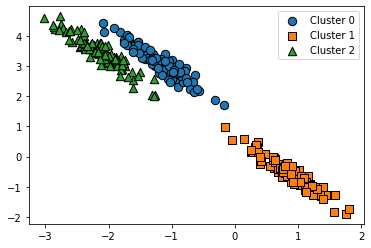

In [28]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
tranformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, tranformation)
# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

* KMeans로 군집화 수행

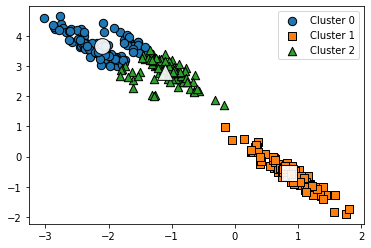

In [29]:
# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

=> KMeans로 군집화 수행할 경우, 주로 원형 영역 위치로 개별 군집화 되면서 원하는 방향으로 구성x. 길쭉한 방향으로 데이터 밀접해 있을 경우 최적의 군집화x.

* GMM으로 군집화 수행

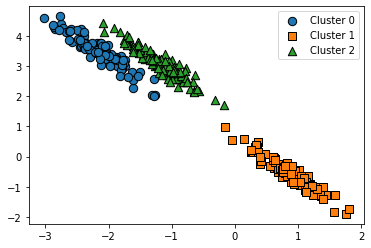

In [30]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

=> 데이터가 분포된 방향에 따라 정확하게 군집화됐음.

* GMM은 군집의 중심 좌표 구할 수 없어 make_blobs()의 target값과 KMeans, GMM의 군집 label 값 서로 비교해 군집화 효율 차이 발생하는지 확인

In [31]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


=> KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우 발생. but GMM의 경우는 군집이 target 값과 잘 매핑됨.

* (장점) KMeans보다 유연하게 다양한 데이터 세트에 잘 적용 가능
* (단점) 군집화를 위한 수행 시간이 오래 걸린다

## 05. DBSCAN



---



### DBSCAN 개요

**DBSCAN**(Density Based Spatial Clustering of Applications with noise) : 밀도 기반 군집화의 대표적인 알고리즘
-간단하고 직관적인 알고리즘. 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능.

* 파라미터 
   + 입실론 주변 영역(epsilon) : 개별 데이터 중심으로 입실론 반경을 가지는 원형의 영역
   + 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

* 데이터 포인트 - 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 정의
  + 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터
  + 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터
  + 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
  + 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

* 사이킷런은 **DBSCAN**클래스 통해 DBSCAN 알고리즘 지원
* 주요 초기화 파라미터
  + **eps** : 입실론 주변 영역의 반경 의미
  + **min_samples** : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수(자신의 데이터 포함. 위에서 설명한 min_samples+1)

### DBSCAN 적용하기 - 붓꽃 데이터 세트

* DBSCAN 클래스 이용해 붓꽃 데이터 세트 군집화
  + 일반적으로 eps 값으로는 1 이하의 값 설정

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


=> 군집 레이블이 -1인 것은 노이즈에 속하는 군집 의미. -> 0과 1 두 개의 군집으로 군집화됨(Target 값 유형이 3가지인데, 군집 2개라고 군집화 효율 떨어진다는 의미x)

* 2차원 평면에서 표현하기 위해 PCA 이용해 2개의 피처로 압축 변환한 뒤, visualize_cluster_plot() 함수 이용해 시각화

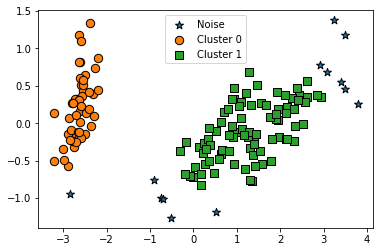

In [33]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

=> PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 들어나 -> 특정 군집 개수로 군집 강제하지 않는 것이 좋아 -> 적절한 파라미터를 통해 최적의 군집 찾아

=> 일반적으로 eps 값 크게 하면 노이즈 데이터 개수 작아져. min_samples 크게 하면 노이즈 데이터 개수 커져.

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


=> eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수(-1 값 3개) 줄어들어

In [37]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


=> eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘리니 노이즈 데이터가 기존보다 많이 증가(22개)

### DBSCAN 적용하기 - make_circles() 데이터 세트

* **make_circles()** 함수 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트 만들기
  + 파라미터 **noise** : 노이즈 데이터 세트의 비율
  + 파라미터 **factor** : 외부 원과 내부 원의 scale 비율

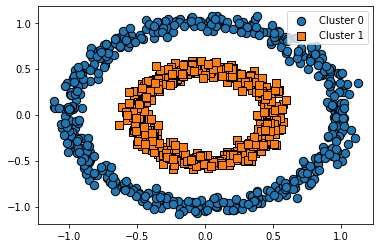

In [38]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

* K-평균으로 make_circles() 데이터 세트 군집화

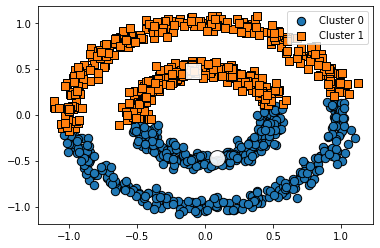

In [40]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

* GMM으로 make_circles() 데이터 세트 군집화

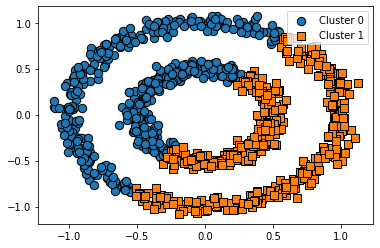

In [41]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

=> 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 x

* DBSCAN으로 make_circles() 데이터 세트 군집화

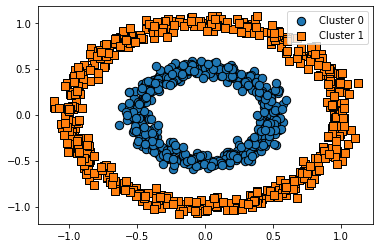

In [42]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

=> DBSCAN으로 군집화 적용해 원하는 방향으로 정확히 군집화가 됐음